In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


iris_feature = 'sepal length', 'sepal width', 'petal length', 'petal width'

path = '../dataset/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x_prime = data[range(4)]
y = pd.Categorical(data[4]).codes
x_prime_train, x_prime_test, y_train, y_test = train_test_split(x_prime, y, train_size=0.7, random_state=0)

feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

## 使用决策树分类

特征： sepal length  +  sepal width
	训练集准确率: 85.7143%
	测试集准确率: 68.8889%

特征： sepal length  +  petal length
	训练集准确率: 98.0952%
	测试集准确率: 91.1111%

特征： sepal length  +  petal width
	训练集准确率: 97.1429%
	测试集准确率: 95.5556%

特征： 

/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is depreca

sepal width  +  petal length
	训练集准确率: 98.0952%
	测试集准确率: 95.5556%

特征： sepal width  +  petal width
	训练集准确率: 96.1905%
	测试集准确率: 95.5556%

特征： petal length  +  petal width
	训练集准确率: 99.0476%
	测试集准确率: 95.5556%



/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecat

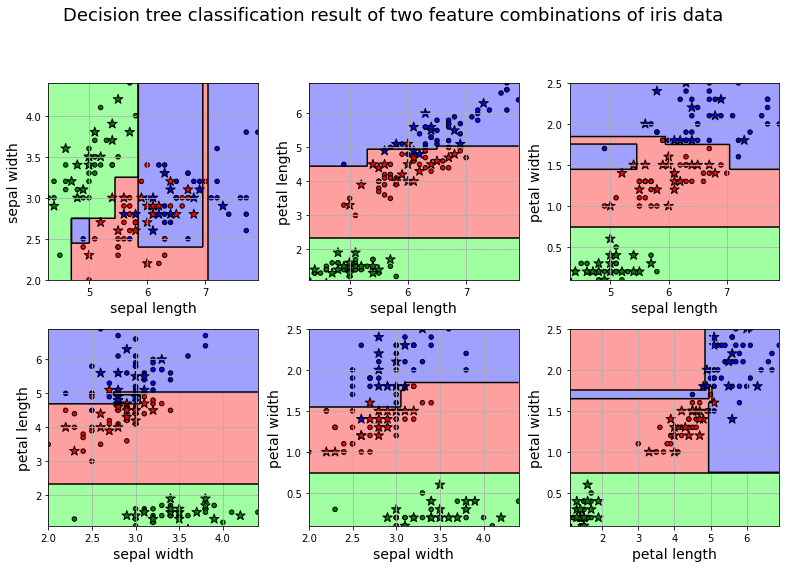

In [2]:
plt.figure(figsize=(11, 8), facecolor='#FFFFFF')
for i, pair in enumerate(feature_pairs):
    # 准备数据
    x_train = x_prime_train[pair]
    x_test = x_prime_test[pair]

    # 决策树学习
    model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
    model.fit(x_train, y_train)

    N, M = 500, 500  # 横纵各采样多少个值
    x1_min, x2_min = x_train.min()
    x1_max, x2_max = x_train.max()
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
    x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

    # 训练集上的预测结果
    y_train_pred = model.predict(x_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    y_test_pred = model.predict(x_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    print('特征：', iris_feature[pair[0]], ' + ', iris_feature[pair[1]])
    print('\t训练集准确率: %.4f%%' % (100*acc_train))
    print('\t测试集准确率: %.4f%%\n' % (100*acc_test))

    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = model.predict(x_show)
    y_hat = y_hat.reshape(x1.shape)
    plt.subplot(2, 3, i+1)
    plt.contour(x1, x2, y_hat, colors='k', levels=[0, 1], antialiased=True)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
    plt.scatter(x_train[pair[0]], x_train[pair[1]], c=y_train, s=20, edgecolors='k', cmap=cm_dark, label=u'训练集')
    plt.scatter(x_test[pair[0]], x_test[pair[1]], c=y_test, s=100, marker='*', edgecolors='k', cmap=cm_dark, label=u'测试集')
    plt.xlabel(iris_feature[pair[0]], fontsize=14)
    plt.ylabel(iris_feature[pair[1]], fontsize=14)
    # plt.legend(loc='upper right', fancybox=True, framealpha=0.3)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid(b=True)
plt.suptitle('Decision tree classification result of two feature combinations of iris data', fontsize=18)
plt.tight_layout(1, rect=(0, 0, 1, 0.92))    # (left, bottom, right, top)
plt.show()

## 使用随机森林分类

特征： sepal length  +  sepal width
OOB Score: 0.7238095238095238
	训练集准确率: 88.5714%
	测试集准确率: 64.4444%



/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


特征： sepal length  +  petal length
OOB Score: 0.9333333333333333
	训练集准确率: 99.0476%
	测试集准确率: 93.3333%



/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


特征： sepal length  +  petal width
OOB Score: 0.9238095238095239
	训练集准确率: 97.1429%
	测试集准确率: 97.7778%



/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


特征： sepal width  +  petal length
OOB Score: 0.9428571428571428
	训练集准确率: 97.1429%
	测试集准确率: 93.3333%



/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


特征： sepal width  +  petal width
OOB Score: 0.9047619047619048
	训练集准确率: 97.1429%
	测试集准确率: 93.3333%



/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


特征： petal length  +  petal width
OOB Score: 0.9523809523809523
	训练集准确率: 99.0476%
	测试集准确率: 97.7778%



/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


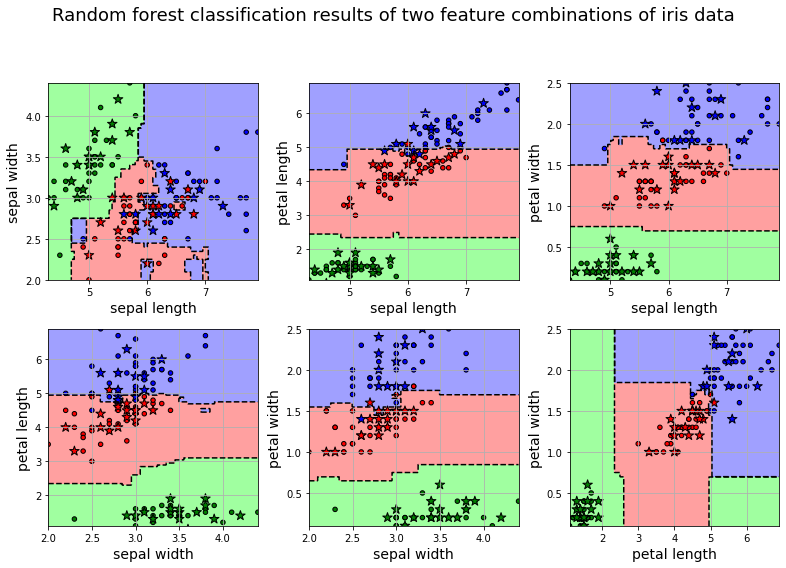

In [3]:
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize=(11, 8), facecolor='#FFFFFF')
for i, pair in enumerate(feature_pairs):
    # 准备数据
    x_train = x_prime_train[pair]
    x_test = x_prime_test[pair]

    # 决策树学习
    model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, oob_score=True)
    model.fit(x_train, y_train)

    # 画图
    N, M = 500, 500  # 横纵各采样多少个值
    x1_min, x2_min = x_train.min()
    x1_max, x2_max = x_train.max()
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
    x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

    # 训练集上的预测结果
    y_train_pred = model.predict(x_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    y_test_pred = model.predict(x_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    print('特征：', iris_feature[pair[0]], ' + ', iris_feature[pair[1]])
    print('OOB Score:', model.oob_score_)
    print('\t训练集准确率: %.4f%%' % (100*acc_train))
    print('\t测试集准确率: %.4f%%\n' % (100*acc_test))

    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = model.predict(x_show)
    y_hat = y_hat.reshape(x1.shape)
    plt.subplot(2, 3, i+1)
    plt.contour(x1, x2, y_hat, colors='k', levels=[0, 1], antialiased=True, linestyles='--', linewidths=1.5)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
    plt.scatter(x_train[pair[0]], x_train[pair[1]], c=y_train, s=20, edgecolors='k', cmap=cm_dark, label=u'训练集')
    plt.scatter(x_test[pair[0]], x_test[pair[1]], c=y_test, s=100, marker='*', edgecolors='k', cmap=cm_dark, label=u'测试集')
    plt.xlabel(iris_feature[pair[0]], fontsize=14)
    plt.ylabel(iris_feature[pair[1]], fontsize=14)
    # plt.legend(loc='upper right', fancybox=True, framealpha=0.3)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid(b=True)
plt.suptitle('Random forest classification results of two feature combinations of iris data', fontsize=18)
plt.tight_layout(1, rect=(0, 0, 1, 0.92))    # (left, bottom, right, top)
plt.show()